# Analysis of Titanic Data
## Description of Data
### VARIABLE DESCRIPTIONS:
* survival        - Survival(0 = No; 1 = Yes)
* pclass          - Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)
* name            - Name
* sex             - Sex
* age             - Age
* sibsp           - Number of Siblings/Spouses Aboard
* parch           - Number of Parents/Children Aboard
* ticket          - Ticket Number
* fare            - Passenger Fare
* cabin           - Cabin
* embarked        - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent:   Mother or Father of Passenger Aboard Titanic
* Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Questions for Analysis
* Describe the status of data. Is there any missing data, if so in which columns?
* What is the overall survival rate ?
* How is survival rate different for Females and Males?
* Which passenger class had the highest survival rate ?
* How is survival rate different for Females and Males of various pssenger classes?
* Are the ages of people who survived substantially different from the one who did not? What is the age distribution of people onboard?
* Is there difference in the fares of people who suvived and who did not?
* Does people who had siblings/spouses onboard had a better survival rate?
* Does people who had parents/children onboard had a better survival rate?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic=pd.read_csv("titanic-data.csv")
titanic.head(3)
# titanic.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print(titanic.columns, "\n")
print(titanic.dtypes, "\n")
n = len(titanic)
print ("Length of Data : \n",n)
print ("Sex : \n",titanic["Sex"].unique())
print ("Pclass : \n",titanic["Pclass"].unique())
print ("Parch : \n",titanic["Parch"].unique())
print ("SibSp : \n",titanic["SibSp"].unique())
print ("Cabin : \n",titanic["Cabin"].unique())
print ("Survived : \n",titanic["Survived"].unique())
titanic_survived = titanic[titanic["Survived"]==1]
titanic_non_survived = titanic[titanic["Survived"]==0]
print(titanic.groupby("Survived")["PassengerId"].count())
print("\nSurvival Rate per 100 : ",len(titanic_survived)/n*100, "%\n")
print("Null Values :\n",titanic.isnull().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Length of Data : 
 891
Sex : 
 ['male' 'female']
Pclass : 
 [3 1 2]
Parch : 
 [0 1 2 5 3 4 6]
SibSp : 
 [1 0 3 4 2 5 8]
Cabin : 
 [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C12

### Status of Data
  Column names of the data alopng with the datatype of the data is printed. There are 891 entries in the table. Of the 891 passengers, 342 survived while 549 did not survive, with a survival rate of 38.38%. There are two levels for Sex and Survived, three for passenger class and six each for Parch and SibSp.
  
  Among the different columns,  there are 177 missing entries in Age, 687 missing entries in Cabin and 2 missing entries in Embarked. The hadling of missing data is metioned in the corresponding subsection.

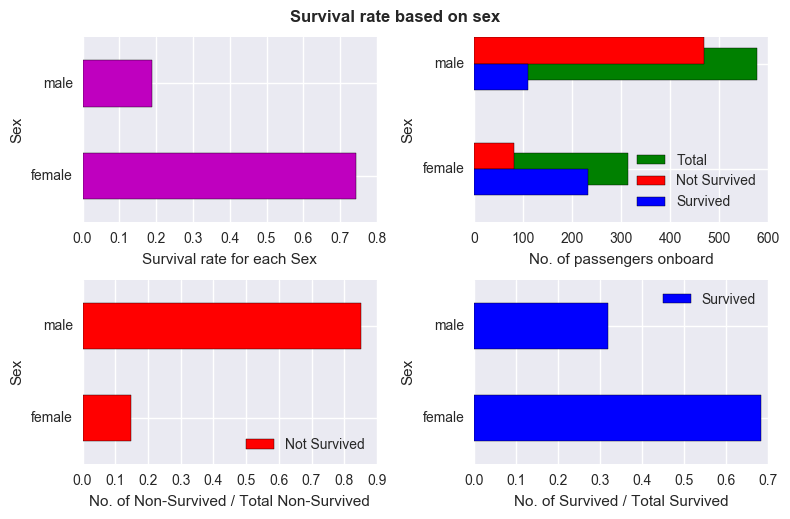

Surval rate based on Sex
female    0.742038
male      0.188908
Name: Sex, dtype: float64

Total passengers : 
 Sex
female    314
male      577
Name: Sex, dtype: int64

Total Percentage: 
 Sex
female    35.241302
male      64.758698
Name: Sex, dtype: float64

Survived : 
 Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

Survived Percentage: 
 Survived  Sex   
0         female    0.090909
          male      0.525253
1         female    0.261504
          male      0.122334
Name: Sex, dtype: float64

Survived : 
 Sex
female    0.681287
male      0.318713
Name: PassengerId, dtype: float64

Non-Survived : 
 Sex
female    0.147541
male      0.852459
Name: PassengerId, dtype: float64


In [4]:
# Visulizing the survival rate based on difference in sexes.
plt.figure(figsize=(8,5))
plt.suptitle('Survival rate based on sex', x=0.5, y= 1.025, fontsize=12, weight=550)

titanic_sex = titanic.groupby(["Survived","Sex"]).count()["PassengerId"]

plt.subplot(221)
(titanic_sex[1]/(titanic_sex[1]+titanic_sex[0])).plot(kind="barh", color="m", width=0.5)
plt.xlabel("Survival rate for each Sex")

plt.subplot(222)
titanic_sex = titanic.groupby(["Survived","Sex"])\
                            ["Sex"].count() # count of grouped data based on Sex for survival(1/0)
titanic.groupby("Sex").count()["PassengerId"].plot(kind="barh", color="g", \
                                                   width=0.3, legend=True, label="Total")
titanic_sex[0].plot(kind="barh", color="r", \
                    legend=True, position=0, width=0.25, label="Not Survived")
titanic_sex[1].plot(kind="barh", color="b", \
                    legend=True, position=1, width=0.25, label="Survived")
plt.xlabel("No. of passengers onboard")

# plt.subplot(222)
titanic_sex_per = titanic.groupby(["Survived","Sex"])["Sex"]\
                .count()/titanic["Sex"].count() # count of grouped data as a percentage of total population
# titanic_sex_per[0].plot(kind="barh", color="r", legend=True, position=0, width=0.25, label="Not Survived")
# titanic_sex_per[1].plot(kind="barh", color="b", legend=True, position=1, width=0.25, label="Survived")
# plt.xlabel("No. of passengers / Total ")


plt.subplot(223)
(titanic_non_survived.groupby(["Sex"])["PassengerId"].count()/len(titanic_non_survived))\
                .plot(kind="barh", color="r", legend=True, width=0.5, label="Not Survived")
plt.xlabel("No. of Non-Survived / Total Non-Survived")

plt.subplot(224)
(titanic_survived.groupby(["Sex"])["PassengerId"].count()/len(titanic_survived))\
                .plot(kind="barh", color="b", legend=True, width=0.5, label="Survived")
plt.xlabel("No. of Survived / Total Survived")

plt.tight_layout()
plt.show()

print ("Surval rate based on", titanic_sex[1]/(titanic_sex[1]+titanic_sex[0]))
print ("\nTotal passengers : \n",titanic.groupby(["Sex"])["Sex"].count())
print ("\nTotal Percentage: \n",titanic.groupby(["Sex"])["Sex"]\
       .count()/titanic["Sex"].count()*100)
print ("\nSurvived : \n",titanic_sex)
print ("\nSurvived Percentage: \n",titanic_sex_per)
print ("\nSurvived : \n",titanic_survived.groupby(["Sex"])["PassengerId"].count()\
       /len(titanic_survived))
print ("\nNon-Survived : \n",titanic_non_survived.groupby(["Sex"])["PassengerId"].count()\
       /len(titanic_non_survived))

### Survival rate based on Sex

By defining a category specific survival rate as given below, we can calculate the fraction of people survived in each category. This definition of survival rate is followed through out this document.

\begin{equation}
Survival\: rate = \dfrac{No. \:of\: people \:survived\: per \:category} {Total\: people\: in\:category}
\end{equation}

A survival rate based on sex indicates that females(.74) have far higher survival rate compared to men(.19).

Among the passengers onboard, 314 were females while 577 were males with a male to female ratio of M:F = 65:35. Of the total passengers onboard, 233 females (26.1%) and 109 males (12.2%) survived, while 468 males (52.52%) and 81 females (9.09%) perished.

Among the survived passengers, majority was females consituting 68.12% of the survived population while males consituted the rest 31.87%. 

Simillarly among the perished passengers, majority was males consituting 85.24% of the non-survived population while females consituted the rest 14.7%.

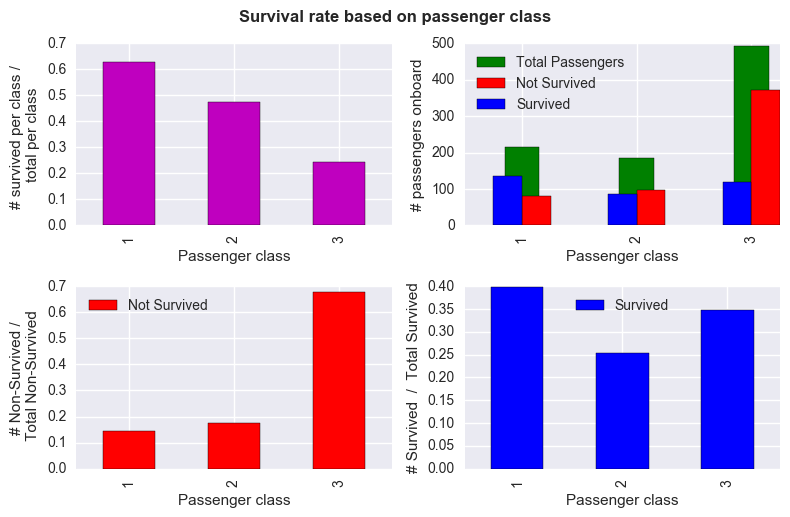

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64 
 Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64 
 Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64 
 Survived  Pclass
0         1         0.089787
          2         0.108866
          3         0.417508
1         1         0.152637
          2         0.097643
          3         0.133558
Name: Pclass, dtype: float64 
 Pclass
1    0.145719
2    0.176685
3    0.677596
Name: PassengerId, dtype: float64 
 Pclass
1    0.397661
2    0.254386
3    0.347953
Name: PassengerId, dtype: float64


In [5]:
titanic_pclass = titanic.groupby(["Survived", "Pclass"])["Pclass"].count()
titanic_pclass_per = titanic.groupby(["Survived", "Pclass"])["Pclass"].count()/n

plt.figure(figsize=(8,5))
plt.suptitle('Survival rate based on passenger class', x=0.5, y= 1.025, fontsize=12, weight=550)

plt.subplot(221)
(titanic_pclass[1]/(titanic_pclass[0]+titanic_pclass[1])).plot(kind="bar",\
                                        color="m",width=0.5)
plt.ylabel("# survived per class / \ntotal per class")
plt.xlabel("Passenger class")

plt.subplot(222)
titanic.groupby("Pclass").count()["PassengerId"].plot(kind="bar",\
                                        color="g",width=0.3, legend=True, label="Total Passengers")
titanic_pclass[0].plot(kind="bar", color="r", legend=True, position=0, width=0.25, label="Not Survived")
titanic_pclass[1].plot(kind="bar", color="b", legend=True, position=1, width=0.25, label="Survived")
plt.xlabel("Passenger class")
plt.ylabel("# passengers onboard")

plt.subplot(223)
(titanic_non_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_non_survived))\
                .plot(kind="bar", color="r", legend=True, width=0.5, label="Not Survived")
plt.ylabel("# Non-Survived /\n Total Non-Survived")
plt.xlabel("Passenger class")

plt.subplot(224)
(titanic_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_survived))\
                .plot(kind="bar", color="b", legend=True, width=0.5, label="Survived")
plt.ylabel("# Survived  /  Total Survived")
plt.xlabel("Passenger class")

plt.tight_layout()
plt.show()

print(titanic.groupby("Pclass").count()["PassengerId"],"\n",\
      titanic.groupby("Pclass").count()["PassengerId"]/n,"\n",\
      titanic_pclass,"\n",titanic_pclass_per,"\n", \
     (titanic_non_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_non_survived)), "\n",\
     (titanic_survived.groupby(["Pclass"])["PassengerId"].count()/len(titanic_survived)))


### Survival rate based on passenger class

Class based survival rate calculation shows that passengers from 1st Class were the most likely to survive. Survival rate followed the order as:

$$1st\: Class(.63) \:>\: 2nd\: Class (.47)\: >\: 3rd Class (.24)$$

Among the total passengers onboard, majority are in 3rd class - 491(55

%) followed by 1st class - 216(24%) and 2nd class - 184(21%). The people who did not survive in the 3rd class constitute the largest group among the total population - 372(42%). The highest number of survived belong to 1st class.

Among the people who did not survive, majority was in 3rd class - 372(68%), while 2nd - 97(17%) and 3rd class - 80(14%) followed.

Among the people who survived, majority was in 1st class - 136(40%), while 3rd class - 119(35%) and 2nd class - 87(25%) followed.

There is a considerable discrepancy in the people who perised with most of them were from 3rd class but among survived, the fraction of people from each class was roughly simlliar. 

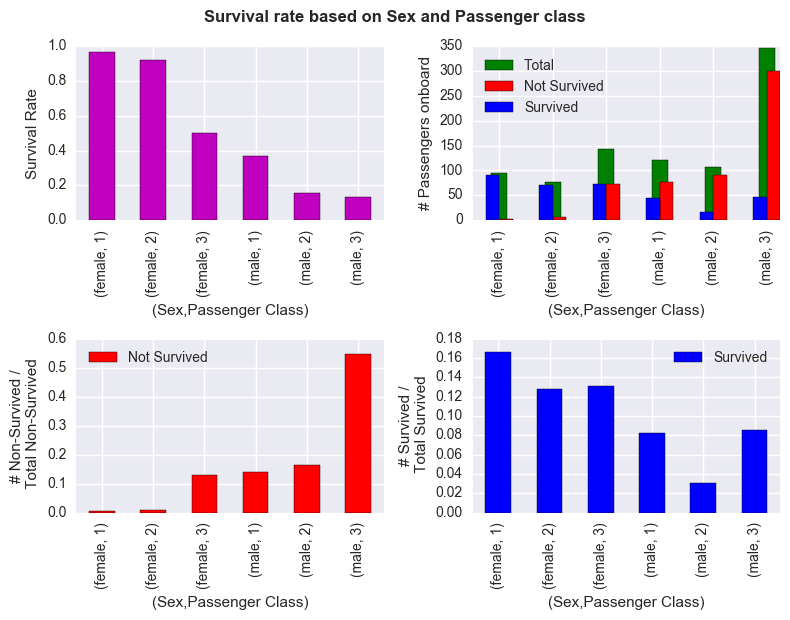

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

Survival Rate :
 Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Pclass, dtype: float64


In [6]:
# grouping data by Survived, Sex and Pclass
titanic_sex_pclass = titanic.groupby(["Survived", "Sex","Pclass"])["Pclass"].count()
titanic_sex_pclass_per = titanic.groupby(["Survived","Sex","Pclass"])["Pclass"].count()/n

plt.figure(figsize=(8,6))
plt.suptitle('Survival rate based on Sex and Passenger class', x=0.5, y= 1.025, fontsize=12, weight=550)

plt.subplot(221)
(titanic_sex_pclass[1]/(titanic_sex_pclass[0]+titanic_sex_pclass[1])).plot(kind="bar",\
                                        color="m",width=0.5)
plt.xlabel("(Sex,Passenger Class)")
plt.ylabel("Survival Rate")

plt.subplot(222)
(titanic_sex_pclass[0]+titanic_sex_pclass[1]).plot(kind="bar", color="g", \
                           legend=True, width=0.3, label="Total")
titanic_sex_pclass[0].plot(kind="bar", color="r", legend=True,\
                           position=0, width=0.25, label="Not Survived")
titanic_sex_pclass[1].plot(kind="bar", color="b", legend=True,\
                           position=1, width=0.25, label="Survived")
plt.xlabel("(Sex,Passenger Class)")
plt.ylabel("# Passengers onboard")

plt.subplot(223)
(titanic_non_survived.groupby(["Sex","Pclass"])["PassengerId"].count()/len(titanic_non_survived))\
                .plot(kind="bar", color="r", legend=True, width=0.5, label="Not Survived")
plt.ylabel("# Non-Survived /\n Total Non-Survived")
plt.xlabel("(Sex,Passenger Class)")

plt.subplot(224)
(titanic_survived.groupby(["Sex","Pclass"])["PassengerId"].count()/len(titanic_non_survived))\
                .plot(kind="bar", color="b", legend=True, width=0.5, label="Survived")
plt.ylabel("# Survived /\n Total Survived")
plt.xlabel("(Sex,Passenger Class)")


plt.tight_layout()
plt.show()

# print(titanic_pclass[0])
print(titanic_pclass)
print("\nSurvival Rate :\n",titanic_sex_pclass[1]/(titanic_sex_pclass[0]+titanic_sex_pclass[1]))

### Survival based on Sex and Passenger class

The females from 1st class is found to have the highest survival rate (.97) among all other groups and the males in the 3rd class have the lowest(0.14). All the females subgroups have a survival rate of more than >50%. Survival rate for any male subgroup is found to be lower than the lowest survival rate for any given female subgroup.

By splitting the population along different groups, males in the 3rd class were found to have the highest number of passengers and the lowest number of survived.

Among the perished, the males in the 3rd class constituted the largest fraction by far compared to all other subgroups.

Among the survived, the females in the first class made up the largest fraction, although the diffrence in the fractional representaion of all other subgroups were less.

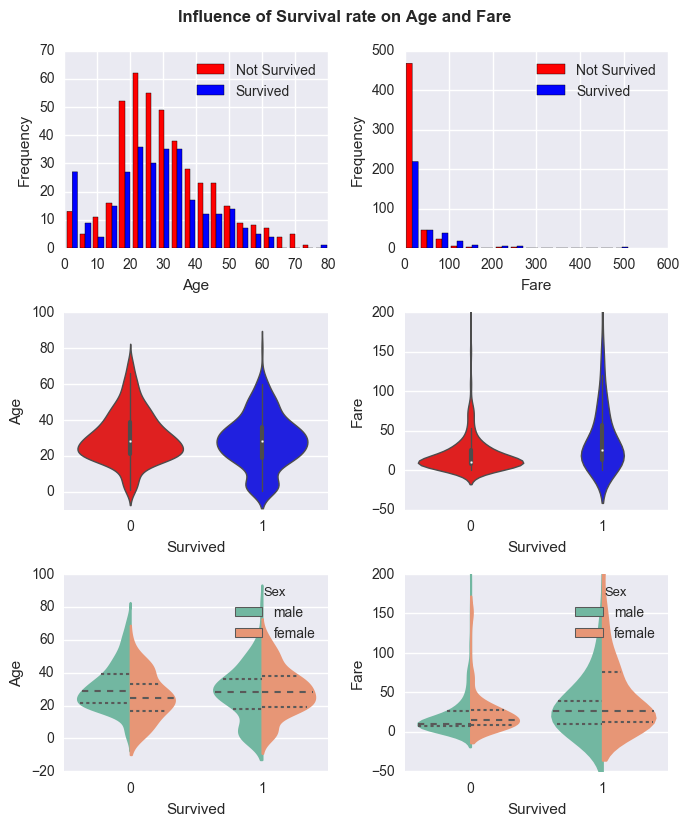

Length of Age data with no-nulls : 714

Median Age: 
 Survived
0    28.0
1    28.0
Name: Age, dtype: float64

Mean Age: 
 Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Median Fare: 
 Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

Mean Fare: 
 Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [68]:
plt.figure(figsize=(7,8))
plt.suptitle('Influence of Survival rate on Age and Fare', x=0.5, y= 1.025, fontsize=12, weight=550)

# 177 null values in the Age column and rows of missing Age values are removed from titanic dataset
titanic_age_notnull = titanic[titanic["Age"].notnull()] 

# cleaned titanic data is seperated into 2 groups: survived and non-survived
titanic_age_survived=titanic_age_notnull[titanic_age_notnull["Survived"]==1] 
titanic_age_non_survived=titanic_age_notnull[titanic_age_notnull["Survived"]==0]

plt.subplot(321)
plt.hist([titanic_age_non_survived["Age"], titanic_age_survived["Age"]], \
         color=['r','b'], alpha=1, bins=20, label=["Not Survived","Survived"])
plt.legend(fontsize=10)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(322)
plt.hist([titanic_non_survived["Fare"], titanic_survived["Fare"]], \
         color=['r','b'], alpha=1, bins=15, label=["Not Survived","Survived"])
plt.legend(fontsize=10)
plt.xlabel("Fare")
plt.ylabel("Frequency")
# plt.ylim(ymin=0, ymax=100)

plt.subplot(323) # Distribution of passenger population in survived/non-survived category based on Sex
sns.violinplot(y="Age",x="Survived",\
               data=titanic, linewidth=1.0, palette=["r","b"])

# sns.boxplot(x="Survived", y="Age", data=titanic_age_notnull, width=.15, linewidth=1, palette=["r","b"], notch=True)
plt.ylim(ymin=-10,ymax=100)

plt.subplot(324)
# sns.boxplot(x="Survived", y="Fare",data=titanic, width=.15, linewidth=0.5, palette=["r","b"], notch=True)
sns.violinplot(y="Fare",x="Survived",\
               data=titanic, linewidth=1.0, palette=["r","b"])
plt.ylim(ymin=-50, ymax=200)

plt.subplot(325)
sns.violinplot(x="Survived", y="Age",hue="Sex",\
               data=titanic_age_notnull,  linewidth=1.5, split=True, palette="Set2",inner="quartile")
plt.subplot(326)
sns.violinplot(hue="Sex", y="Fare",x="Survived",\
               data=titanic, linewidth=1.5, split=True, palette="Set2",inner="quartile")
plt.ylim(ymin=-50, ymax=200)



plt.tight_layout()
plt.show()

print("Length of Age data with no-nulls :",len(titanic_age_notnull))
print("\nMedian Age: \n", titanic_age_notnull.groupby("Survived")["Age"].median())
print("\nMean Age: \n",titanic_age_notnull.groupby("Survived")["Age"].mean())
print("\nMedian Fare: \n", titanic.groupby("Survived")["Fare"].median())
print("\nMean Fare: \n",titanic.groupby("Survived")["Fare"].mean())

/Users/Bibin/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


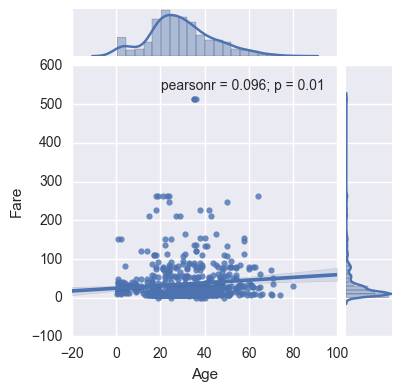

In [33]:
plt.figure(figsize=(7,5))
plt.suptitle('Age vs Fare', x=0.5, y= 1.025, fontsize=12, weight=550)
sns.jointplot(y="Fare",x="Age",data=titanic_age_notnull, kind="reg", size=4)
plt.show()
# titanic_age_notnull.isnull().sum()

### Distribution of Age and Fare based on Survival rate

A new dataset `titanic_age_notnull` is created after removing the 177 rows with missing entries in Age column for the  analysis pertaining to Age.

In most age groups, more passengers perished than survived except for the infants (1-5yrs) and the elderly(>75yrs). Most people who did not survive were between the ages 20-40yrs. It is expected since this age group constituted the biggest population onboard. The median age of the passengers survived(28) and perished (28)  remained same. The mean age of survived (30) was slightly higher, but it was very close to perished passengers (28). It has to be noted that there is significant difference in the survived population below < 20yrs (kids and infants) compared to perished. Overall the difference in age between survived and perished were not remarkably different. Since there were 177 missing age data, the actual age age distribution could have been different.

The average fare for survived(48) was almost twice as higher that the perished(22). The median age also followed the trend with survived(26) and non-survived(10). Among the passengers who paid more than \>100 as their Fare, majority has survived. The fare distribution of the survived was much more spread out while for the perished passengers, the fare was close to 10 with a narrower distribution around the lower spectrum of the fares. It can be concluded that the fare of people who have survived is significantly higher than perished ones. 

The age and fare distribution between the sexes where not particulary different. No strong relation was observed between Age and Fare of passengers.

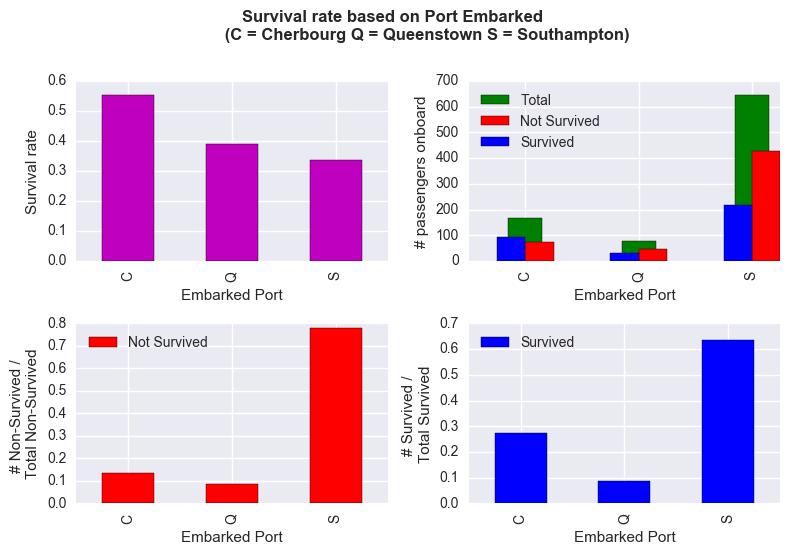

Surval rate based on Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Embarked, dtype: float64

Total passengers : 
 Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

Total Percentage: 
 Embarked
C    18.897638
Q     8.661417
S    72.440945
Name: Embarked, dtype: float64

Survived : 
 Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64

Survived Percentage: 
 Survived  Embarked
0         C           0.084364
          Q           0.052868
          S           0.480315
1         C           0.104612
          Q           0.033746
          S           0.244094
Name: Embarked, dtype: float64

Survived : 
 Embarked
C    0.271930
Q    0.087719
S    0.634503
Name: Embarked, dtype: float64

Non-Survived : 
 Embarked
C    0.136612
Q    0.085610
S    0.777778
Name: Embarked, dtype: float64


In [9]:
# Visulizing the survival rate based on port Embarked.
plt.figure(figsize=(8,5))
plt.suptitle('Survival rate based on Port Embarked \n\
              (C = Cherbourg Q = Queenstown S = Southampton)',\
             x=0.5, y= 1.1, fontsize=12, weight=550)

# 2 null values in Embarked column is removed implicitly by matplotlib while plotting 
titanic_embarked = titanic.groupby(["Survived","Embarked"]).count()["PassengerId"]
titanic_embarked_per = titanic.groupby(["Survived","Embarked"])["Embarked"]\
                .count()/titanic["Embarked"].count() # count of grouped data as a percentage of total population

plt.subplot(221) # Survival rate for each port
(titanic_embarked[1]/(titanic_embarked[1]+titanic_embarked[0])).plot(kind="bar", color="m", width=0.5)
plt.xlabel("Embarked Port")
plt.ylabel("Survival rate")

plt.subplot(222) # Split of population based on Embarked port in survived/non-survived category
titanic_embarked = titanic.groupby(["Survived","Embarked"])\
                            ["Embarked"].count() # count of grouped data based on embaked port for survival(1/0)
titanic.groupby("Embarked").count()["PassengerId"].plot(kind="bar", color="g", \
                                                   width=0.3, legend=True, label="Total")
titanic_embarked[0].plot(kind="bar", color="r", \
                    legend=True, position=0, width=0.25, label="Not Survived")
titanic_embarked[1].plot(kind="bar", color="b", \
                    legend=True, position=1, width=0.25, label="Survived")
plt.ylabel("# passengers onboard")
plt.xlabel("Embarked Port")

plt.subplot(223) # Split of passenger population in non-survived population
(titanic_non_survived.groupby(["Embarked"])["PassengerId"].count()/len(titanic_non_survived))\
                .plot(kind="bar", color="r", legend=True, width=0.5, label="Not Survived")
plt.ylabel("# Non-Survived / \nTotal Non-Survived")
plt.xlabel("Embarked Port")

plt.subplot(224) # Split of passenger population in survived population
(titanic_survived.groupby(["Embarked"])["PassengerId"].count()/len(titanic_survived))\
                .plot(kind="bar", color="b", legend=True, width=0.5, label="Survived")
plt.ylabel("# Survived / \nTotal Survived")
plt.xlabel("Embarked Port")

plt.tight_layout()
plt.show()

print ("Surval rate based on", titanic_embarked[1]/(titanic_embarked[1]+titanic_embarked[0]))
print ("\nTotal passengers : \n",titanic.groupby(["Embarked"])["Embarked"].count())
print ("\nTotal Percentage: \n",titanic.groupby(["Embarked"])["Embarked"]\
       .count()/titanic["Embarked"].count()*100)
print ("\nSurvived : \n",titanic_embarked)
print ("\nSurvived Percentage: \n",titanic_embarked_per)
print ("\nSurvived : \n",titanic_survived.groupby(["Embarked"])["Embarked"].count()\
       /len(titanic_survived))
print ("\nNon-Survived : \n",titanic_non_survived.groupby(["Embarked"])["Embarked"].count()\
       /len(titanic_non_survived))

### Survival rate based on the port embarked

There are 2 missing entries in the Embarked column and it is removed implicity by matplotlib while plotting.

All the passengers were found to emabarked from one of the three ports given by Cherbourg(C),Queenstown(Q)and Southampton(S). Survival rate is found to be highest for the people who embarked from C. The survival rate order follows C > Q > S. 

The biggest portion of the people boarded from S - 644(72%), followed by Q 168(18%) and C 77(8%). 

Passengers embarked from S constituted the largest proportion in the survived(63%) as well as non-survived(78%) population. This is due to the fact that majority of the population embarked from S.

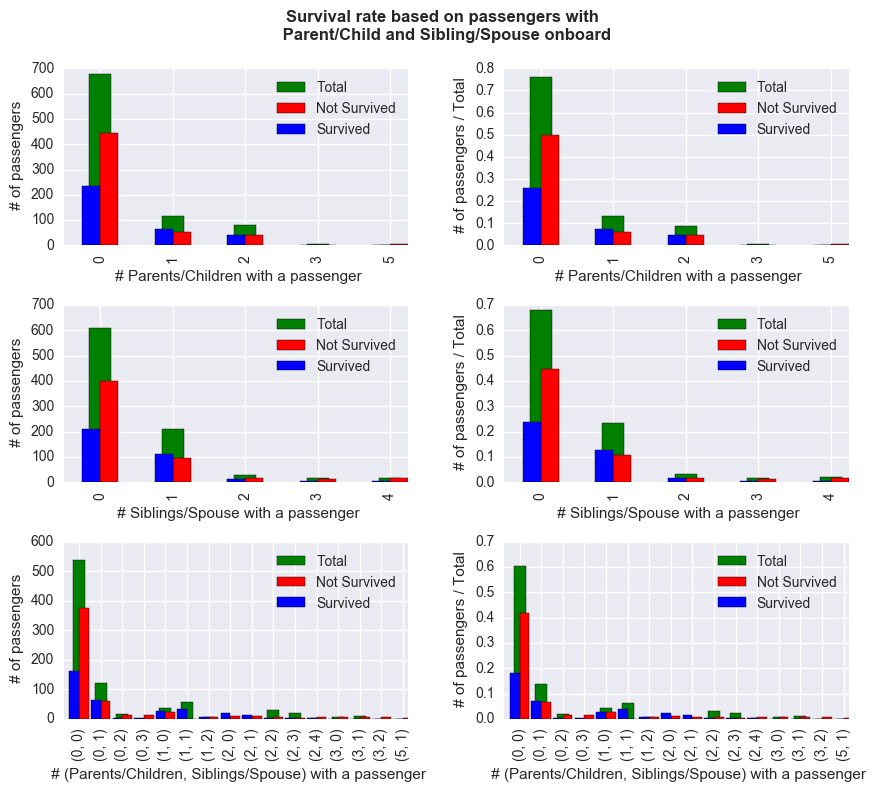

In [78]:
plt.figure(figsize=(9,7.5))
plt.suptitle('Survival rate based on passengers with \n Parent/Child and Sibling/Spouse onboard',\
             x=0.5, y= 1.05, fontsize=12, weight=550)
titanic_Parch = titanic.groupby(["Survived","Parch"])["Parch"].count()
titanic_Parch_per = titanic.groupby(["Survived","Parch"])["Parch"].count()/n

# Grouping based on the presence of sibling-spouse onboard.
plt.subplot(321)
(titanic_Parch[0]+titanic_Parch[1]).plot(kind="bar", color="g", legend=True, width=0.3, label="Total")
titanic_Parch[0].plot(kind="bar", color="r", legend=True, position=0, width=0.25, label="Not Survived")
titanic_Parch[1].plot(kind="bar", color="b", legend=True, position=1, width=0.25, label="Survived")
plt.xlabel(" # Parents/Children with a passenger")
plt.ylabel(" # of passengers")

plt.subplot(322)
(titanic_Parch_per[0]+titanic_Parch_per[1]).plot(kind="bar", color="g", legend=True, width=0.3, label="Total")
titanic_Parch_per[0].plot(kind="bar", color="r", legend=True, position=0, width=0.25, label="Not Survived")
titanic_Parch_per[1].plot(kind="bar", color="b", legend=True, position=1, width=0.25, label="Survived")
plt.xlabel(" # Parents/Children with a passenger")
plt.ylabel(" # of passengers / Total")

titanic_SibSp = titanic.groupby(["Survived","SibSp"])["SibSp"].count()
titanic_SibSp_per = titanic.groupby(["Survived","SibSp"])["SibSp"].count()/n

# Grouping based on the presence of parent-child onboard.
plt.subplot(323)
(titanic_SibSp[0]+titanic_SibSp[1]).plot(kind="bar", color="g", legend=True, width=0.3, label="Total")
titanic_SibSp[0].plot(kind="bar", color="r", legend=True, position=0, width=0.25, label="Not Survived")
titanic_SibSp[1].plot(kind="bar", color="b", legend=True, position=1, width=0.25, label="Survived")
plt.xlabel(" # Siblings/Spouse with a passenger")
plt.ylabel(" # of passengers")

plt.subplot(324)
(titanic_SibSp_per[0]+titanic_SibSp_per[1]).plot(kind="bar",\
                           color="g", legend=True, width=0.3, label="Total")
titanic_SibSp_per[0].plot(kind="bar", color="r",\
                          legend=True, position=0, width=0.25, label="Not Survived")
titanic_SibSp_per[1].plot(kind="bar", color="b", \
                          legend=True, position=1, width=0.25, label="Survived")
plt.xlabel(" # Siblings/Spouse with a passenger")
plt.ylabel(" # of passengers / Total")

# Grouping based on the presence of  sibling-spouse and parent-child onboard.
titanic_SibSp_Parch = titanic.groupby(["Survived","Parch","SibSp"])["Parch"].count()
titanic_SibSp_Parch_per = titanic.groupby(["Survived","Parch","SibSp"])["Parch"].count()/n

plt.subplot(325) # numbers in each category
(titanic_SibSp_Parch[0]+titanic_SibSp_Parch[1]).plot(kind="bar", \
                            color="g", legend=True, width=0.55, label="Total")
titanic_SibSp_Parch[0].plot(kind="bar", color="r", \
                            legend=True, position=0, width=0.45, label="Not Survived")
titanic_SibSp_Parch[1].plot(kind="bar", color="b", \
                            legend=True, position=1, width=0.45, label="Survived")
plt.xlabel(" # (Parents/Children, Siblings/Spouse) with a passenger")
plt.ylabel(" # of passengers")

plt.subplot(326) # as a fraction of the total
(titanic_SibSp_Parch_per[0]+titanic_SibSp_Parch_per[1]).plot(kind="bar",\
                                color="g", legend=True, width=0.55, label="Total")
titanic_SibSp_Parch_per[0].plot(kind="bar", color="r",\
                                legend=True, position=0, width=0.45, label="Not Survived")
titanic_SibSp_Parch_per[1].plot(kind="bar", color="b", \
                                legend=True, position=1, width=0.45, label="Survived")
plt.xlabel(" # (Parents/Children, Siblings/Spouse) with a passenger")
plt.ylabel(" # of passengers / Total")

plt.tight_layout()
plt.show()

# print(titanic_Parch, titanic_Parch_per)
# print(titanic_SibSp, titanic_SibSp_per)
# print(titanic_SibSp_Parch, titanic_SibSp_Parch_per)

### Survival rate based on passengers with Parent/Child and Sibling/Spouse onboard

#### Passengers with Parent/Child
* Total  : 678 (76%) pasengers did not have any parent/child onboard while 213 (24%) passengers had atleast one parent/child onboard.

* Perished  : 445 (50%) pasengers did not have any parent/child onboard while 104 (12%) passengers had atleast one parent/child onboard.

* Survived: 233 (26%) passengers did not have any parent/child onboard while 109 (12%) passengers had atleast one parent/child onboard.

#### Passengers with Sibling/Spouse
* Total  : 608 (68.5%) pasengers did not have any Sibling/Spouse onboard while 271 (31%) passengers had atleast one Sibling/Spouse onboard.

* Perished  : 398 (45%) pasengers did not have any Sibling/Spouse onboard while 139 (16%) passengers had atleast one Sibling/Spouse onboard.

* Survived: 210 (23.5%) passengers did not have any Sibling/Spouse onboard while 132(15%) passengers had atleast one Sibling/Spouse onboard.

#### Passengers with Parent/Child or Sibling/Spouse
* Total : 537 (60%) pasengers did not have any parent/child or sibling/spouse onboard while 354 (40%) passengers had atleast one Parent/Child or Sibling/Spouse onboard.

* Perished : 374 (42%) pasengers did not have any parent/child or sibling/spouse onboard while 175 (20%) passengers had atleast one Parent/Child or Sibling/Spouse onboard.

* Survived: 163 (18.3%) passengers did not have any parent/child or Sibling/Spouse onboard while 179 (20%) passengers had atleast one Parent/Child or Sibling/Spouse onboard.


## Conclusion

* Hypotheses: 
    * Females have a higher survival rate. 
    * Age distribution of survived is different from perished.

Although females consituted a minority in the passengers onboard, they had higher survival rate than men and formed the majority of the survived population. Among different classes, passengers in 1st class had a higher survival rate. In particular the best chance of survival was for females in 1st and 2nd class where almost all survived. The distribution of survived among different classes was similar. Most of the passengers from 3rd class did not survive since the 3rd class had a larger population mostly males. 

Although survived and perished passengers had similar median age, the age distribution of survived were more spread out with more young population (infants and kids). Most of the perished were around the age of 28. A significant number of the entries  were missing in the age column and hence the result could be biased and has to be interpreted with higher margin of error.

Survival rate based on the embarked ports showed a highest for Cherbourg while most of the passengers boarded from Southampton.

It is notable that larger majority of the passengers did not have a parent, child, sibling or spouse onboard with them and half of the passengers who had atleast one parent/child/sibling/spouse had survived.

Based on the analysis person with highest chance of survival: Female, 1st class, embarked-cherbourg, age-28yrs, Fare-48, with atleast one person onboard.

Limitations: 

* The analysis has not taken into account the duplication of data. It has been asumed that each entry is unique. 
* Rows with missing values in columns (Age, Cabin, Emabarked) have been removed for the analysis of corresponding columns. This reduces the fidelity of the analysis based on available data.
* The dataset is only a subset of total original passengers onboard and the factors such as survival rate could vary.
* The passsengers could have given wrong information regarding their passenger name, class, age and fare so as to have access to life boats. Especially passengers could have pretended to have accompanying parents/children/siblings/spouses to gain access to life boats.
* The age, fare, passenger class and name of infants/kids/elderly/disabled could have been assumed by the interviewer resulting in wrongful entries.

## Additional analysis based on Cabin Class

new_Cabin
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: new_Cabin, dtype: int64


Survived  new_Cabin
0         A              8
          B             12
          C             24
          D              8
          E              8
          F              5
          G              2
          T              1
          n            481
1         A              7
          B             35
          C             35
          D             25
          E             24
          F              8
          G              2
          n            206
Name: new_Cabin, dtype: int64

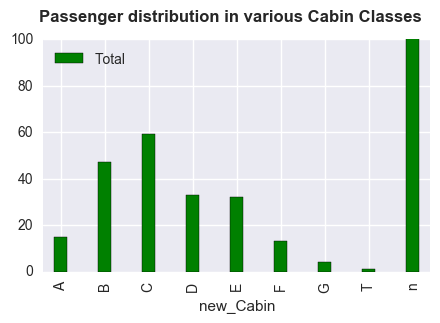

In [6]:
# Analysis based on Cabin Class
plt.figure(figsize=(5,3))
plt.suptitle('Passenger distribution in various Cabin Classes' ,\
             x=0.5, y= 1., fontsize=12, weight=550)
# Extracting cabin class as the first letter of the cabin
char_cabin = titanic["Cabin"].astype(str) # Convert data to str
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter
titanic["new_Cabin"] = pd.Categorical(new_Cabin)

titanic_cabin = titanic.groupby(["Survived","new_Cabin"])["new_Cabin"].count()
titanic.groupby(["new_Cabin"])["new_Cabin"].count().plot(kind="bar", color="g", \
                    legend=True, width=0.3, label="Total")
plt.ylim(ymin=0,ymax=100)

print(titanic.groupby(["new_Cabin"])["new_Cabin"].count()[0:8])
titanic_cabin

In [14]:
np.where(titanic["new_Cabin"] == "T")
titanic.iloc[339]

PassengerId                             340
Survived                                  0
Pclass                                    1
Name           Blackwell, Mr. Stephen Weart
Sex                                    male
Age                                      45
SibSp                                     0
Parch                                     0
Ticket                               113784
Fare                                   35.5
Cabin                                     T
Embarked                                  S
new_Cabin                                 T
Name: 339, dtype: object